## Initial Settings

In [1]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 53649, done.
remote: Counting objects: 100% (1009/1009), done.
remote: Compressing objects: 100% (920/920), done.
remote: Total 53649 (delta 320), reused 337 (delta 73), pack-reused 52640
Receiving objects: 100% (53649/53649), 38.91 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (38010/38010), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-py3-none-any.whl size=1947882 sha256=9f9f650030baadd2fca8561e4a96b3286c56b881163c0aa03a351baf0d5d3714
  Stored in directory: /tmp/pip-ephem-wheel-cache-ea9zytgv/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [2]:
%cd examples/text_to_image

/content/diffusers/examples/text_to_image


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00


In [4]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [5]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## FineTuning W/LoRA

In [ ]:
from datasets import load_dataset
dataset = load_dataset("lambdalabs/pokemon-blip-captions")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/833 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 833
    })
})

In [ ]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/data/impression_img_caption.csv')
df2=pd.read_csv('/content/drive/MyDrive/caption_data/img_caption_oilcanvas.csv')
df2.head()

,image,text
0,t3_v19k6z.jpg,a man with a toothbrush in his mouth
1,t3_ut94cu.jpg,a pier with waves and a green building
2,t3_rngqc1.jpg,a field with trees and clouds
3,t3_odc9x4.jpg,a river and mountains in the background
4,t3_tc64zc.jpg,oranges on a green background


In [ ]:
df1.head()

,image,text
0,impressionism_3.jpg,a woman sitting in the grass
1,impressionism_14.jpg,a woman sitting in front of a bird
2,impressionism_22.jpg,a house with trees and a tree
3,impressionism_25.jpg,a bridge over a river with a tower in the back...
4,impressionism_40.jpg,flowers and a fan on a table


In [ ]:
df=pd.concat([df1,df2],axis=0)
df.head()

,image,text
0,impressionism_3.jpg,a woman sitting in the grass
1,impressionism_14.jpg,a woman sitting in front of a bird
2,impressionism_22.jpg,a house with trees and a tree
3,impressionism_25.jpg,a bridge over a river with a tower in the back...
4,impressionism_40.jpg,flowers and a fan on a table


In [ ]:
df.to_csv('/content/drive/MyDrive/caption_data/final.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14823 entries, 0 to 1762
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   14823 non-null  object
 1   text    14823 non-null  object
dtypes: object(2)
memory usage: 347.4+ KB


In [ ]:
#허깅페이스에 데이터셋 올리기
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Eunju2834/img_captioning_oilcanvas_style")
dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 1763
    })
})

In [ ]:
dataset2 = load_dataset("Eunju2834/oil_impressionism_style")
dataset2

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 14823
    })
})

In [ ]:
import os
from PIL import Image
img_name=os.listdir('/content/drive/MyDrive/data/image/test')
Pa='/content/drive/MyDrive/data/image/test2/'
for i in range(len(img_name)):
  img=Image.open('/content/drive/MyDrive/data/image/test/'+img_name[i])
  img.save(Pa+img_name[i],'jpeg')


* train_text_to_img_lora.py 수정
* 이미지 처리 부분 수정

In [ ]:
!CUDA_VISIBLE_DEVICES="0" accelerate launch train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name="Eunju2834/oil_impressionism_style" --caption_column="text" \
  --resolution=512 --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=20 --checkpointing_steps=10000 \
  --learning_rate=1e-04 --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --seed=2024 \
  --output_dir="/content/drive/MyDrive/sd_model_fintuning_w.LoRA/fintune model" \
  --validation_prompt="Oil Painting, Impressionism, oil painting with brushstrokes, bichu, Park stroll, joyful atmosphere, laughter-filled time, playful dogs, vibrant park scene, cheerful interactions, happy pet owners, heartwarming moments, vibrant community vibes "  --report_to="wandb"

2024-01-30 06:18:02.066290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 06:18:02.066353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 06:18:02.068075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 06:18:03.275781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
01/30/2024 06:18:04 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

{'variance_type', 'clip_sample_range', 'prediction_type', 'rescale_betas_zer

## Inference

In [20]:
from diffusers import StableDiffusionPipeline
import torch
import os

model_path = os.listdir('/content/drive/MyDrive/sd_model_fintuning_w.LoRA/fintune model')[-1] #FineTuning Model Path
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.unet.load_attn_procs('/content/drive/MyDrive/sd_model_fintuning_w.LoRA/fintune model/'+model_path)
pipe.to("cuda")

#positive prompt
prompt = '''(masterpiece, best quality, ultra detailed), Oil Painting, Impressionism, oil painting with brush strokes, bichu,
Park stroll, joyful atmosphere, laughter-filled time, playful dogs, vibrant park scene,
cheerful interactions, happy pet owners, heartwarming moments, vibrant community vibes'''

#negative prompt
neg_prompt='''FastNegativeV2,(bad-artist:1.0), (loli:1.2),
(worst quality, low quality:1.4), (bad_prompt_version2:0.8),
bad-hands-5,lowres, bad anatomy, bad hands, ((text)), (watermark),
error, missing fingers, extra digit, fewer digits, cropped,
worst quality, low quality, normal quality, ((username)), blurry,
 (extra limbs), bad-artist-anime, badhandv4, EasyNegative,
 ng_deepnegative_v1_75t, verybadimagenegative_v1.3, BadDream,
(three hands:1.1),(three legs:1.1),(more than two hands:1.4),
(more than two legs,:1.2),badhandv4,EasyNegative,ng_deepnegative_v1_75t,verybadimagenegative_v1.3,(worst quality, low quality:1.4),text,words,logo,watermark,
'''

image = pipe(prompt, negative_prompt=neg_prompt,num_inference_steps=30, guidance_scale=7.5).images[0]
image.save("/content/drive/MyDrive/sd_model_fintuning_w.LoRA/image/oil_impressionism_park_stroll.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

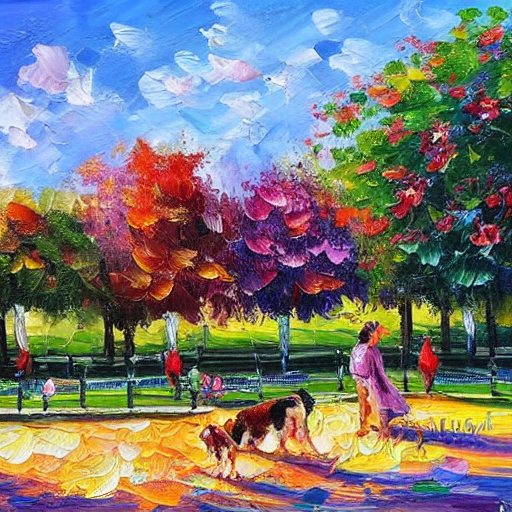

In [21]:
image

## Model Save

In [ ]:
from huggingface_hub.repocard import RepoCard

lora_model_id = 'Eunju2834/Sd_Oil_Impression'#FineTuning Model Path
card = RepoCard.load(lora_model_id)
base_model_id = card.data.to_dict()["base_model"]

pipe = StableDiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-65b9a3f8-450a15ce6270b92f00937bf5;6d50ece4-7473-4e64-bf50-cd6ba2b11ff8)

Entry Not Found for url: https://huggingface.co/Eunju2834/Sd_Oil_Impression/resolve/main/README.md.